In [1]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, kstest
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams.update({
    'font.size': 16,
    'axes.labelsize': 16,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'axes.linewidth': 1.2,
    'xtick.major.width': 1.2,
    'ytick.major.width': 1.2,
    'savefig.format': 'png',
    'savefig.bbox': 'tight',
    'font.family': 'Times New Roman',
    'text.usetex': False
})

In [3]:
df = pd.read_csv('../dataset/data.csv')
columns = ['T', 'TSM', 'CHL', 'CDOM', 'EV']
data = df[columns].dropna()

In [4]:
def test_normality(data, column):
    stat_sw, p_sw = shapiro(data[column])
    print(f'Shapiro-Wilk Test for {column}:')
    print(f'Statistic: {stat_sw}, p-value: {p_sw}')
    if p_sw > 0.05:
        print(f'{column} appears normally distributed (p > 0.05).')
    else:
        print(f'{column} does not appear normally distributed (p ≤ 0.05).')
    print()
    data_normalized = (data[column] - data[column].mean()) / data[column].std()
    stat_ks, p_ks = kstest(data_normalized, 'norm')
    print(f'Kolmogorov-Smirnov Test for {column}:')
    print(f'Statistic: {stat_ks}, p-value: {p_ks}')
    if p_ks > 0.05:
        print(f'{column} appears normally distributed (p > 0.05).')
    else:
        print(f'{column} does not appear normally distributed (p ≤ 0.05).')
    print()
    return stat_sw, p_sw, stat_ks, p_ks

In [5]:
results = [test_normality(data, col) for col in columns]
table_data = [
    ['Metric', 'T', 'TSM', 'CHL', 'CDOM', 'EV'],
    ['SW'] + [f'{stat_sw:.4f}' for stat_sw, _, _, _ in results],
    ['p$_{SW}$'] + [f'{p_sw:.2e}' for _, p_sw, _, _ in results],
    ['KS'] + [f'{stat_ks:.4f}' for _, _, stat_ks, _ in results],
    ['p$_{KS}$'] + [f'{p_ks:.4f}' for _, _, _, p_ks in results],
    ['Normality'] + ['None' for _ in columns]
]

Shapiro-Wilk Test for T:
Statistic: 0.9554771922784835, p-value: 2.711899106539829e-07
T does not appear normally distributed (p ≤ 0.05).

Kolmogorov-Smirnov Test for T:
Statistic: 0.09552300529920998, p-value: 0.01427703340519887
T does not appear normally distributed (p ≤ 0.05).

Shapiro-Wilk Test for TSM:
Statistic: 0.9394579841640055, p-value: 5.079866008457815e-09
TSM does not appear normally distributed (p ≤ 0.05).

Kolmogorov-Smirnov Test for TSM:
Statistic: 0.11137089328248018, p-value: 0.002435405617728651
TSM does not appear normally distributed (p ≤ 0.05).

Shapiro-Wilk Test for CHL:
Statistic: 0.9329347763238338, p-value: 1.2091153724580618e-09
CHL does not appear normally distributed (p ≤ 0.05).

Kolmogorov-Smirnov Test for CHL:
Statistic: 0.09684380252899993, p-value: 0.012448983109398104
CHL does not appear normally distributed (p ≤ 0.05).

Shapiro-Wilk Test for CDOM:
Statistic: 0.963159730307284, p-value: 2.4552722155404775e-06
CDOM does not appear normally distributed 

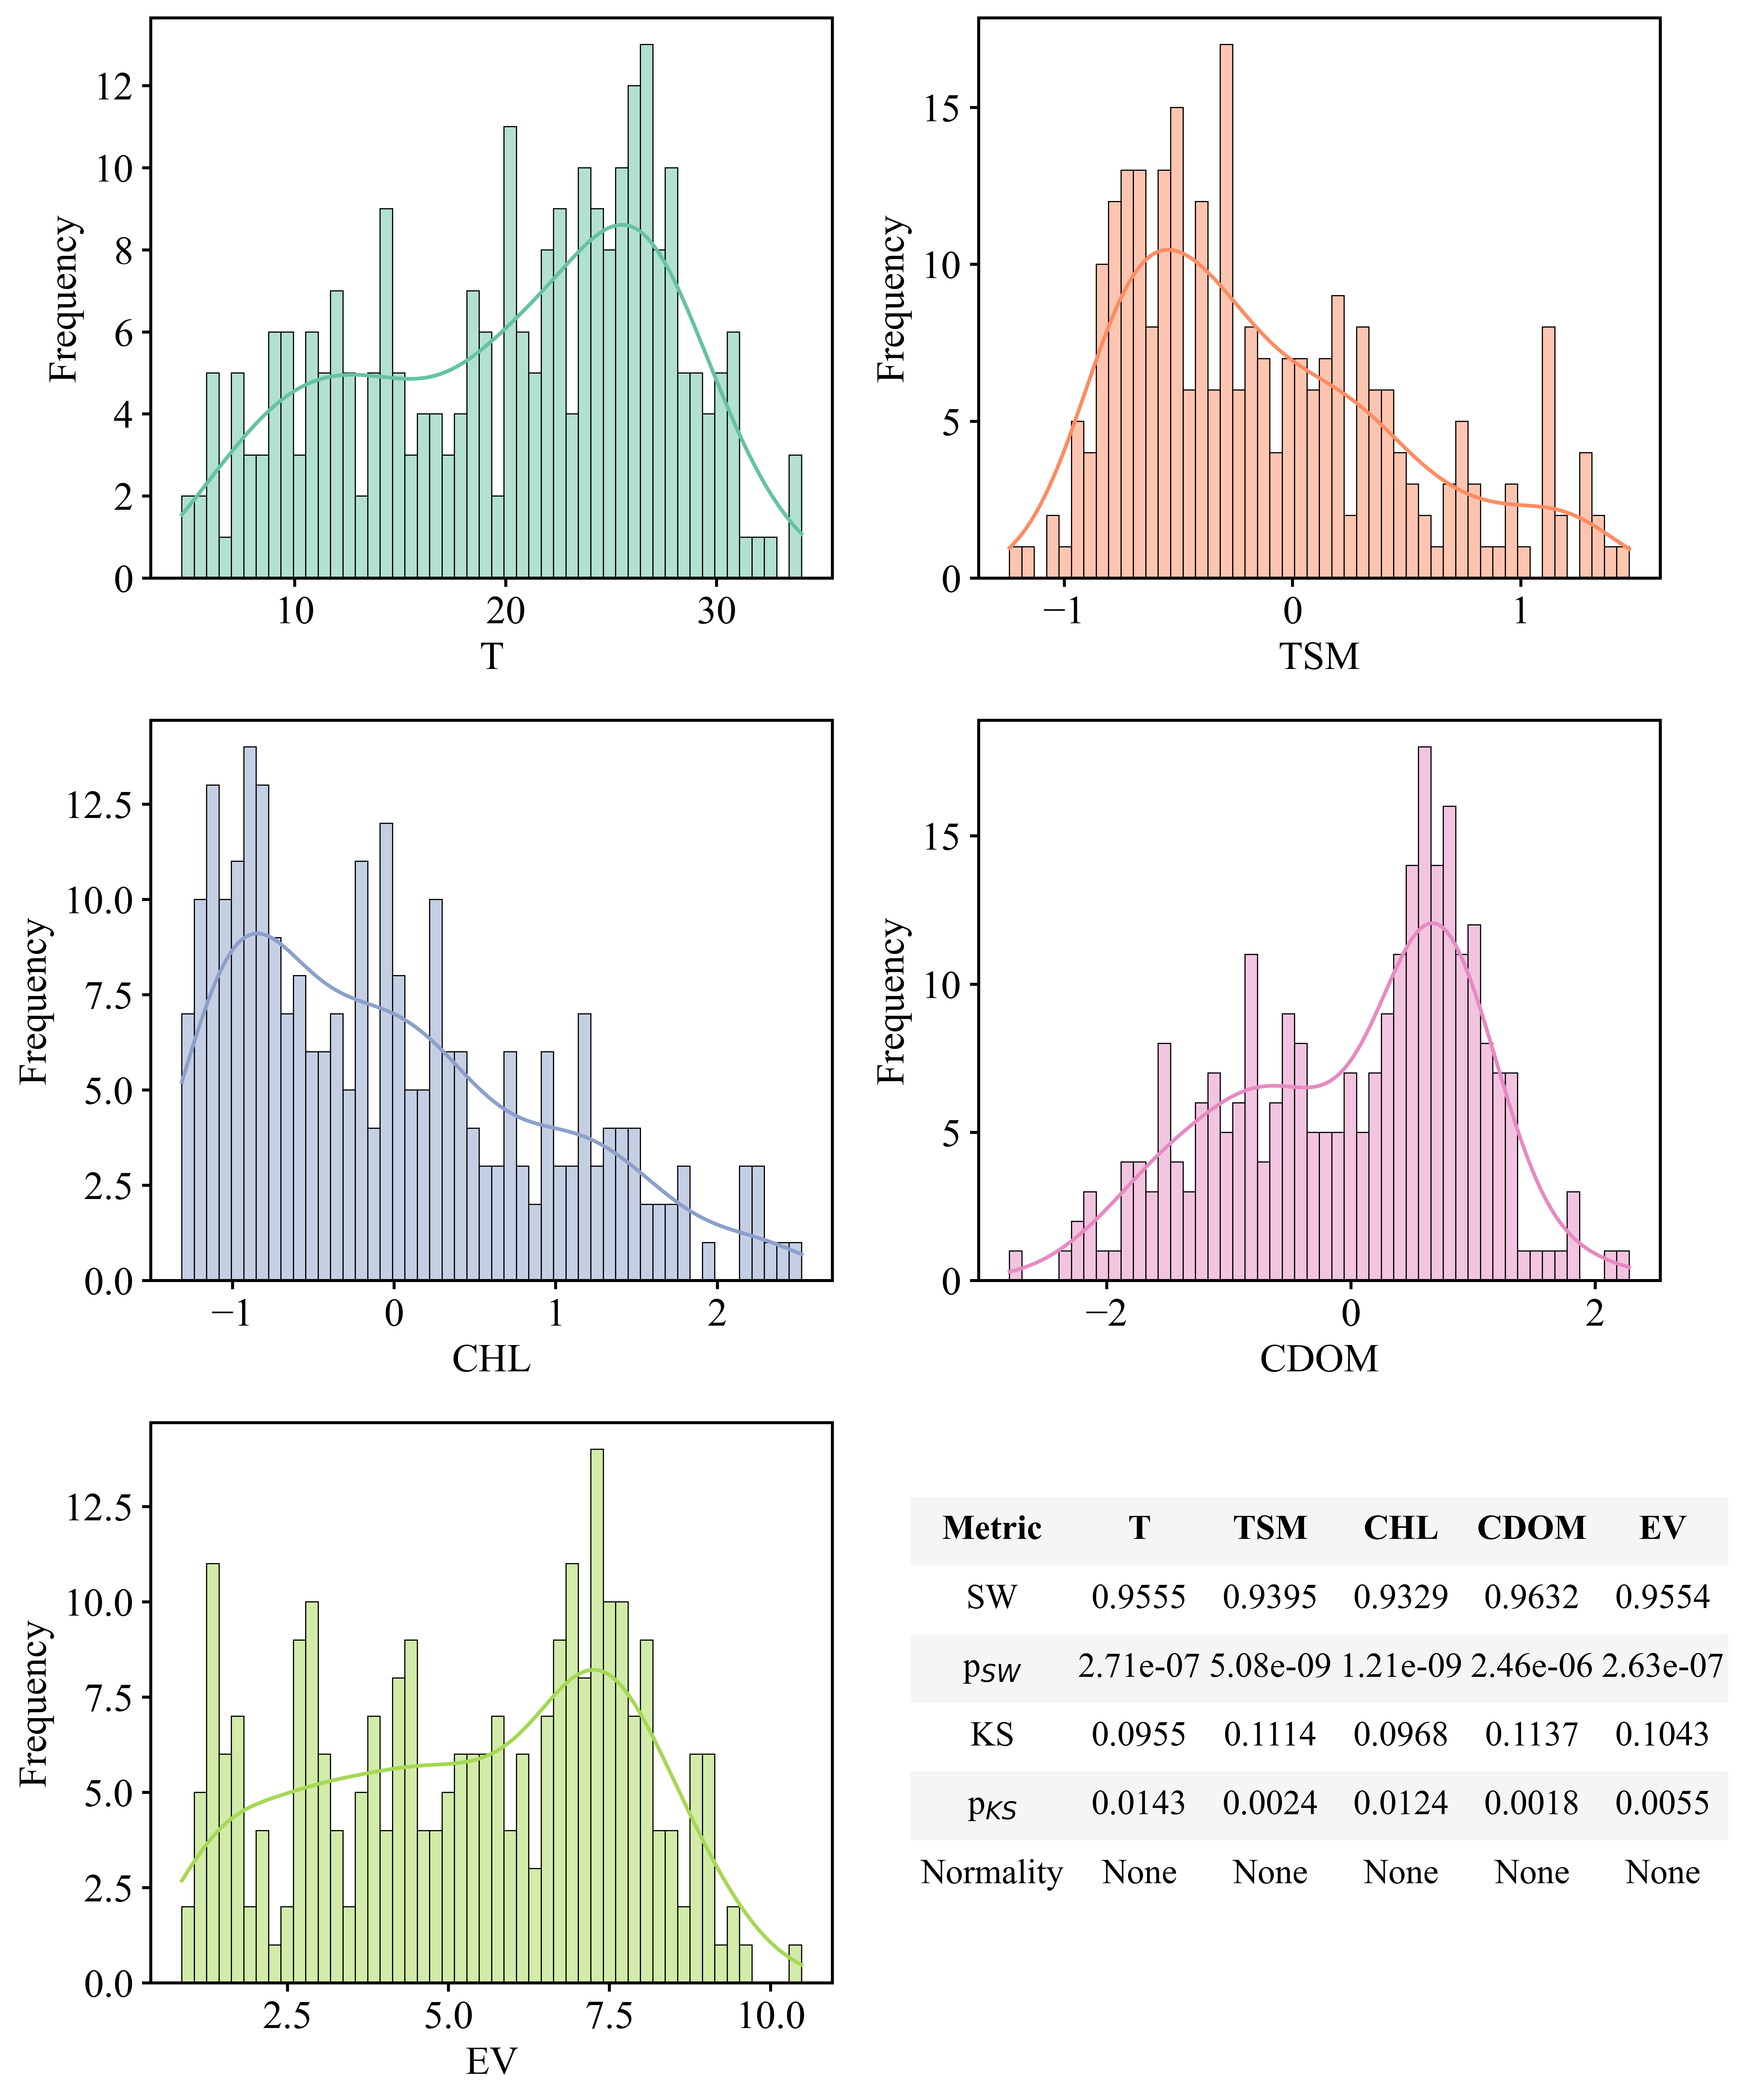

In [6]:
fig, axes = plt.subplots(3, 2, figsize=(10, 12), dpi=600)
axes = axes.flatten()

colors = sns.color_palette("Set2", n_colors=5)
for i, col in enumerate(columns):
    sns.histplot(data[col], bins=50, kde=True, color=colors[i], ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title('')

# Format everything as strings with desired style
formatted_table_data = []
for row in table_data:
    formatted_row = []
    for val in row:
        if isinstance(val, (int, float)):
            formatted_row.append(f"{val:.1e}")
        else:
            formatted_row.append(str(val))
    formatted_table_data.append(formatted_row)

# Use the formatted version in the table
table = axes[5].table(cellText=formatted_table_data, loc='center', cellLoc='center',
                      colWidths=[0.2, 0.16, 0.16, 0.16, 0.16, 0.16])

table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.2, 2.0)
for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_text_props(weight='bold')
    cell.set_facecolor('#F5F5F5' if i % 2 == 0 else '#FFFFFF')
    cell.set_edgecolor('none')
    cell.set_linewidth(0 if j > 0 and j < len(table_data[0]) else 1)
axes[5].axis('off')

plt.tight_layout()

# Save figure as PNG with notebook name
plt.savefig(f"./../plots/normality.png", dpi=600, bbox_inches='tight')

plt.show()